# Sophisticated Urban Planning with Machine Learning
- __Project Name__: Capstone Project - The Battle of Neighborhoods
- __Course Name__: IBM Data Science Professional Certificate
- __Author__: Yeji Soh

## 1. Introduction

__Urban Planning__ has been given a big importance for any city in order to have orderly development in urban and suburb areas. It includes such techniques as predicting population growth, zoning, geographic mapping/analysis, and identifying the way that land has been used.(source: https://en.wikipedia.org/wiki/Urban_planning)<br>
__Clustering__, as one of the most popular unsupervised Machine Learning concepts, is widely used to divide data points into a certain number of groups in the way that data points in the same groups, i.e. clusters, share more similar attributes compared to others in different groups.<br>
In the sense that urban planning requires various segmenting studies by the extent of development, clustering will be a good method to be used in terms of designing and planning neighborhoods.<br>
This study is focused on city of Calgary, which is where author lives currently. This study can be used for
- urban planners, by suggesting how to have impartial development for each neighborhood,
- potential business owners, by suggesting where to avoid, e.g. supersaturated area, and where to target to open their business.

## 2. Data

The official website of City of Calgary kindly made their census data[1](https://data.calgary.ca/Demographics/Census-by-Community-2019/rkfr-buzb) open to public. This census data includes the number of dwelling units and population for each unit, where it belongs to a certain sector (e.g. Centre, East, West, North, South, NE, NW, SE, SW) and is categorized as either 'built-out', 'developing', 'non-residential' or 'N/A' depending on the yearly development. Also, a class code represents the type of areas, which is categorized by four: Residential(1), Industrial(2), Major Park(3), and Residual Sub Area(4). Note that residual sub areas were deleted in that they don't contain any information.<br><br>
To start with, the API call was made to access to the most recent census data . A 'requests' module of Python is used and the data is received in json format. Not all the columns of data is necessary, so data cleaning should be carried out in here to have only essential data in a data frame.
Next, using the name of neighborhood, the latitude and longitude for each neighborhood will be obtained with geocoder package in Python. These geographical data will be used in making a API call to Four Square to get nearby venues to understand what kind of business is needed for potential developing neighborhoods. For the data analysis, a variety of data science techniques are to be utilized, such as data wrangling, exploratory data analysis and K-Means Clustering.

### 2.1 Census Data

#### (1) Import Necessary Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import math
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geopy.distance

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### (2) Get census data

In [2]:
url = "https://data.calgary.ca/resource/rkfr-buzb.json"
results = requests.get(url).json()
results

[{'class': 'Residential',
  'class_code': '1.0',
  'comm_code': 'LEG',
  'name': 'LEGACY',
  'sector': 'SOUTH',
  'srg': 'DEVELOPING',
  'comm_structure': 'BUILDING OUT',
  'cnss_yr': '2019',
  'res_cnt': '6420.0',
  'dwell_cnt': '2766.0',
  'prsch_chld': '850.0',
  'elect_cnt': '0.0',
  'emplyd_cnt': '0.0',
  'ownshp_cnt': '1826.0',
  'dog_cnt': '0.0',
  'cat_cnt': '0.0',
  'pub_sch': '1071.0',
  'sep_sch': '506.0',
  'pubsep_sch': '175.0',
  'other_sch': '107.0',
  'unknwn_sch': '907.0',
  'sing_famly': '1081.0',
  'duplex': '356.0',
  'multi_plex': '14.0',
  'apartment': '1004.0',
  'town_house': '311.0',
  'manuf_home': '0.0',
  'conv_struc': '0.0',
  'comunl_hse': '0.0',
  'res_comm': '0.0',
  'other_res': '0.0',
  'nursing_hm': '0.0',
  'other_inst': '0.0',
  'hotel_cnt': '0.0',
  'other_misc': '0.0',
  'apt_no_res': '8.0',
  'apt_occpd': '909.0',
  'apt_owned': '394.0',
  'apt_person': '1759.0',
  'apt_vacant': '83.0',
  'apt_uc': '2.0',
  'apt_na': '2.0',
  'cnv_no_res': '0.0',

- Let's see what kind of information is in this census data.

In [3]:
results[0].keys()

dict_keys(['class', 'class_code', 'comm_code', 'name', 'sector', 'srg', 'comm_structure', 'cnss_yr', 'res_cnt', 'dwell_cnt', 'prsch_chld', 'elect_cnt', 'emplyd_cnt', 'ownshp_cnt', 'dog_cnt', 'cat_cnt', 'pub_sch', 'sep_sch', 'pubsep_sch', 'other_sch', 'unknwn_sch', 'sing_famly', 'duplex', 'multi_plex', 'apartment', 'town_house', 'manuf_home', 'conv_struc', 'comunl_hse', 'res_comm', 'other_res', 'nursing_hm', 'other_inst', 'hotel_cnt', 'other_misc', 'apt_no_res', 'apt_occpd', 'apt_owned', 'apt_person', 'apt_vacant', 'apt_uc', 'apt_na', 'cnv_no_res', 'cnv_occpd', 'cnv_owned', 'cnv_person', 'cnv_vacant', 'cnv_uc', 'cnv_na', 'dup_no_res', 'dup_occpd', 'dup_owned', 'dup_person', 'dup_vacant', 'dup_uc', 'dup_na', 'mfh_no_res', 'mfh_occpd', 'mfh_owned', 'mfh_person', 'mfh_vacant', 'mfh_uc', 'mfh_na', 'mul_no_res', 'mul_occpd', 'mul_owned', 'mul_person', 'mul_vacant', 'mul_uc', 'mul_na', 'oth_no_res', 'oth_occpd', 'oth_owned', 'oth_person', 'oth_vacant', 'oth_uc', 'oth_na', 'twn_no_res', 'twn_o

- Let's see the number of neighborhoods in Calgary.

In [7]:
noNeigh = len(results)
print('Number of Neighborhoods in Calgary is', noNeigh)

Number of Neighborhoods in Calgary is 306


- Create a dataframe with the only conlumns containing necessary information.

In [3]:
col_names = ['Class Code','Neighborhood','Sector','SRG' ,'Total Residents','Total Dwellings']
df = pd.DataFrame(columns = col_names)

- Input necessary information into cells.

In [4]:
for result in results:
    classCode = result['class_code']
    neighName = result['name']
    sector = result['sector']
    srg = result['srg']
    residentsCount = result['res_cnt']
    dwlCount = result['dwell_cnt']
    
    df = df.append({'Class Code': classCode, 'Neighborhood': neighName, 
                    'Sector': sector, 'SRG': srg, 'Total Residents': residentsCount, 'Total Dwellings': dwlCount}, ignore_index=True)

In [5]:
df.shape

(306, 6)

- Change data types

In [6]:
convert_dict = {'Class Code': float, 'Total Residents': float, 'Total Dwellings': float}
df = df.astype(convert_dict) 
print(df.dtypes)

Class Code         float64
Neighborhood        object
Sector              object
SRG                 object
Total Residents    float64
Total Dwellings    float64
dtype: object


- Remove Residual Sub Area

In [7]:
df = df[df["Class Code"] != 4.0]

In [8]:
df.shape

(258, 6)

In [16]:
print("Now, we have total {} neighborhoods, after excluding residual sub areas.".format(df.shape[0]))

Now, we have total 258 neighborhoods, after excluding residual sub areas.


#### (3) Add Geographical Data using geocoder

- Format the address for geocoder to read latitude and longitude

In [17]:
nb = []
for i in df['Neighborhood']:
    nb.append(i)

In [18]:
lat = []
long = []

for n in nb:
    address = n + ', Calgary, AB'
    
    try:
        geolocator = Nominatim(user_agent="yyc_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
    except:
        latitude = None
        longitude = None
    
    lat.append(latitude)
    long.append(longitude)

In [19]:
yyc_geodata = pd.DataFrame(list(zip(nb, lat, long)), columns=['Neighborhood','Latitude','Longitude'])

In [20]:
yyc_geodata

Neighborhood   Latitude   Longitude
0                           LEGACY  50.856893 -114.002560
1                    HIGHLAND PARK  51.085355 -114.065809
2                      CORNERSTONE  51.160280 -113.939608
3                       MONTGOMERY  51.074802 -114.162474
4                           TEMPLE  51.088424 -113.947877
5                         WOODBINE  50.942554 -114.128853
6               UNIVERSITY HEIGHTS  51.070740 -114.137231
7                         BANKVIEW  51.033887 -114.099518
8     ALBERT PARK/RADISSON HEIGHTS  51.044845 -113.990195
9                     GREAT PLAINS  50.986638 -113.939036
10                    KELVIN GROVE  50.990874 -114.084830
11                        STONEY 2  50.907010 -113.912853
12                      SHAGANAPPI  51.042939 -114.124599
13                        WILDWOOD  51.054508 -114.153229
14                          ELBOYA  51.011575 -114.073960
15                      BRIDLEWOOD  50.900713 -114.110515
16                  LAKE BONAVISTA  50.940024 -114.048912
17                         SUNALTA  51.042940 -114.101413
18                         BOWNESS  51.089277 -114.193075
19                  GARRISON WOODS  51.017387 -114.113621
20                     ASPEN WOODS  51.043119 -114.210185
21                        RICHMOND  51.031439 -114.115487
22                      RED CARPET  51.041307 -113.940680
23                        SOMERSET  51.050381 -114.172969
24               PENBROOKE MEADOWS  51.047740 -113.946924
25                     ROYAL VISTA  51.152083 -114.203685
26                     THORNCLIFFE  51.106096 -114.069411
27                       WESTWINDS  51.100692 -113.971867
28                    COUGAR RIDGE  51.070710 -114.210968
29                       WHITEHORN  51.088808 -113.970020
30                       WOODLANDS  50.942435 -114.109359
31                     POINT MCKAY  51.060167 -114.146004
32                MARLBOROUGH PARK  51.059881 -113.948947
33                       SHAWNESSY  50.908539 -114.085165
34                      AUBURN BAY  50.890605 -113.959565
35                         BELMONT  50.868495 -114.062773
36        EAST FAIRVIEW INDUSTRIAL  50.984530 -114.038799
37                       INGLEWOOD  51.038800 -114.027489
38                       ABBEYDALE  51.058836 -113.929413
39           UNIVERSITY OF CALGARY  51.074233 -114.146284
40                    DIAMOND COVE  50.946477 -114.022722
41                        EDGEMONT  51.128623 -114.142711
42                  NOSE HILL PARK  51.111159 -114.110588
43                     ARBOUR LAKE  51.136786 -114.202355
44                       MIDNAPORE  50.910752 -114.055844
45                        PALLISER  50.967469 -114.110772
46                    SPRUCE CLIFF  51.049706 -114.138633
47                          MCCALL  51.088182 -114.028523
48                        TARADALE  51.116704 -113.938464
49                 GOLDEN TRIANGLE  51.012322 -113.983396
50            BRIDGELAND/RIVERSIDE  51.053801 -114.044310
51                BURNS INDUSTRIAL  51.001061 -114.037984
52             KILLARNEY/GLENGARRY  51.031579 -114.129749
53                        HAWKWOOD  51.129711 -114.175068
54                       HIGHFIELD  51.014833 -114.041203
55            GREENWOOD/GREENBRIAR  51.090697 -114.222957
56                CRESCENT HEIGHTS  51.059629 -114.060886
57                     ROCKY RIDGE  51.143274 -114.242722
58                HUNTINGTON HILLS  51.118724 -114.068288
59                        SHERWOOD  51.159564 -114.148693
60                        REDSTONE  51.170807 -113.957483
61                     FALCONRIDGE  51.102692 -113.945649
62                       SUNNYSIDE  51.057870 -114.078740
63                     MAPLE RIDGE  50.958098 -114.038730
64                        MERIDIAN  51.057259 -113.996285
65                        ROSEMONT  51.075345 -114.090674
66                 STRATHCONA PARK  51.047868 -114.184479
67                       SOUTHWOOD  50.957248 -114.083819
68                  

- Merge two dataframes

In [14]:
df_final = df
df_final = df_final.join(yyc_geodata.set_index('Neighborhood'), on='Neighborhood')
df_final

Class Code                   Neighborhood     Sector         SRG  \
0           1.0                         LEGACY      SOUTH  DEVELOPING   
1           1.0                  HIGHLAND PARK     CENTRE   BUILT-OUT   
2           1.0                    CORNERSTONE  NORTHEAST  DEVELOPING   
3           1.0                     MONTGOMERY  NORTHWEST   BUILT-OUT   
4           1.0                         TEMPLE  NORTHEAST   BUILT-OUT   
6           1.0                       WOODBINE      SOUTH   BUILT-OUT   
7           1.0             UNIVERSITY HEIGHTS  NORTHWEST   BUILT-OUT   
8           1.0                       BANKVIEW     CENTRE   BUILT-OUT   
9           1.0   ALBERT PARK/RADISSON HEIGHTS       EAST   BUILT-OUT   
11          2.0                   GREAT PLAINS       EAST         N/A   
13          1.0                   KELVIN GROVE      SOUTH   BUILT-OUT   
14          2.0                       STONEY 2  NORTHEAST         N/A   
15          1.0                     SHAGANAPPI     CENTRE   BUILT-OUT   
16          1.0                       WILDWOOD       WEST   BUILT-OUT   
17          1.0                         ELBOYA     CENTRE   BUILT-OUT   
18          1.0                     BRIDLEWOOD      SOUTH   BUILT-OUT   
19          1.0                 LAKE BONAVISTA      SOUTH   BUILT-OUT   
20          1.0                        SUNALTA     CENTRE   BUILT-OUT   
21          1.0                        BOWNESS  NORTHWEST   BUILT-OUT   
22          1.0                 GARRISON WOODS     CENTRE   BUILT-OUT   
23          1.0                    ASPEN WOODS       WEST  DEVELOPING   
24          1.0                       RICHMOND     CENTRE   BUILT-OUT   
25          1.0                     RED CARPET       EAST   BUILT-OUT   
26          1.0                       SOMERSET      SOUTH   BUILT-OUT   
27          1.0              PENBROOKE MEADOWS       EAST   BUILT-OUT   
28          2.0                    ROYAL VISTA  NORTHWEST         N/A   
29          1.0                    THORNCLIFFE      NORTH   BUILT-OUT   
30          2.0                      WESTWINDS  NORTHEAST         N/A   
31          1.0                   COUGAR RIDGE       WEST  DEVELOPING   
32          1.0                      WHITEHORN  NORTHEAST   BUILT-OUT   
33          1.0                      WOODLANDS      SOUTH   BUILT-OUT   
34          1.0                    POINT MCKAY     CENTRE   BUILT-OUT   
35          1.0               MARLBOROUGH PARK  NORTHEAST   BUILT-OUT   
36          1.0                      SHAWNESSY      SOUTH   BUILT-OUT   
39          1.0                     AUBURN BAY  SOUTHEAST  DEVELOPING   
40          1.0                        BELMONT      SOUTH  DEVELOPING   
42          2.0       EAST FAIRVIEW INDUSTRIAL      SOUTH         N/A   
43          1.0                      INGLEWOOD     CENTRE   BUILT-OUT   
45          1.0                      ABBEYDALE  NORTHEAST   BUILT-OUT   
47          1.0          UNIVERSITY OF CALGARY  NORTHWEST   BUILT-OUT   
48          1.0                   DIAMOND COVE      SOUTH   BUILT-OUT   
49          1.0                       EDGEMONT  NORTHWEST   BUILT-OUT   
50          3.0                 NOSE HILL PARK  NORTHWEST         N/A   
51          1.0                    ARBOUR LAKE  NORTHWEST   BUILT-OUT   
52          1.0                      MIDNAPORE      SOUTH   BUILT-OUT   
53          1.0                       PALLISER      SOUTH   BUILT-OUT   
54          1.0                   SPRUCE CLIFF       WEST   BUILT-OUT   
55          2.0                         MCCALL  NORTHEAST         N/A   
56          1.0                       TARADALE  NORTHEAST  DEVELOPING   
57          2.0                GOLDEN TRIANGLE       EAST         N/A   
58          1.0           BRIDGELAND/RIVERSIDE     CENTRE   BUILT-OUT   
59          2.0               BURNS INDUSTRIAL     CENTRE         N/A   
60          1.0            KILLARNEY/GLENGARRY     CENTRE   BUILT-OUT   
61          1.0                       HAWKWOOD  NORTHWEST   BUI

- Export final data to local machine

In [81]:
df_final.to_csv(r'C:\Users\Yeji Soh\Desktop\IBM Certificate\Applied Data Science Capstone\Capstone\df_final.csv', index = False)

In [26]:
df_final = pd.read_csv(r'C:\Users\Yeji Soh\Desktop\IBM Certificate\Applied Data Science Capstone\Capstone\df_final.csv')  

In [28]:
df_final.shape

(258, 8)

In [29]:
df_final.dropna(subset=['Latitude'],inplace=True)
df_final.shape

(247, 8)

### 2.2 Amenities/Facilities Data

FourSquare API call will be made to get the information on venues that each neighborhood has.<br><br>
__(1) Define FourSquare Credentials and Version__

In [50]:
cred = 'foursquareCredentials.txt'
with open(cred) as cred:
    content = cred.readlines()
content = [x.strip() for x in content] 

CLIENT_ID = content[0]
CLIENT_SECRET = content[1] 
VERSION = content[2]

__(2) Create a function to get maximum 100 nearby(within radius 500m) venues for each neighborhood__

In [52]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

__(3) Focus on 'Developing' Areas__

In [53]:
developing=[]
developing = df_final[df_final['SRG'] == 'DEVELOPING']

In [54]:
developing.reset_index(drop=True, inplace=True)

In [55]:
developing.shape

(37, 8)

- Get Venues for Developing neighborhoods

In [56]:
developing_venues = getNearbyVenues(names = developing['Neighborhood'], latitudes=developing['Latitude'], longitudes=developing['Longitude'])

LEGACY
CORNERSTONE
ASPEN WOODS
COUGAR RIDGE
AUBURN BAY
BELMONT
TARADALE
ROCKY RIDGE
SHERWOOD
REDSTONE
SKYVIEW RANCH
SADDLE RIDGE
SILVERADO
WALDEN
COPPERFIELD
YORKVILLE
PINE CREEK
CHAPARRAL
WOLF WILLOW
KINCORA
CITYSCAPE
LIVINGSTON
HASKAYNE
CRANSTON
SETON
MAHOGANY
HOMESTEAD
SAGE HILL
NOLAN HILL
EVANSTON
CARRINGTON
WEST SPRINGS
MCKENZIE TOWNE
NEW BRIGHTON
PANORAMA HILLS
EVERGREEN
SPRINGBANK HILL


In [57]:
print(developing_venues.shape)
developing_venues.head()

(125, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0       LEGACY              50.856893             -114.002560   
1  CORNERSTONE              51.160280             -113.939608   
2  ASPEN WOODS              51.043119             -114.210185   
3  ASPEN WOODS              51.043119             -114.210185   
4  ASPEN WOODS              51.043119             -114.210185   

                       Venue  Venue Latitude  Venue Longitude  \
0       Shane Homes - Legacy       50.858113      -114.001418   
1  Shane Homes - Cornerstone       51.160791      -113.939727   
2                  Starbucks       51.041163      -114.209547   
3         A Ladybug and Cafe       51.041340      -114.212507   
4                  Edo Japan       51.041333      -114.210438   

        Venue Category  
0   Real Estate Office  
1   Real Estate Office  
2          Coffee Shop  
3          Coffee Shop  
4  Japanese Restaurant

In [58]:
v = developing_venues.groupby('Neighborhood').count()

In [59]:
devAmenityNo = v[['Venue']]
devAmenityNo.sort_values(by='Venue', ascending=False, inplace=True)
devAmenityNo.rename(columns={"Venue":"Total Amenities"}, inplace=True)
devAmenityNo

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Total Amenities
Neighborhood                   
ASPEN WOODS                  26
MCKENZIE TOWNE               21
HASKAYNE                     10
CHAPARRAL                     7
COUGAR RIDGE                  6
EVERGREEN                     6
TARADALE                      5
COPPERFIELD                   5
WEST SPRINGS                  5
CRANSTON                      4
HOMESTEAD                     4
AUBURN BAY                    4
SAGE HILL                     3
SADDLE RIDGE                  2
CITYSCAPE                     2
SETON                         2
NOLAN HILL                    2
REDSTONE                      2
SILVERADO                     1
MAHOGANY                      1
ROCKY RIDGE                   1
PANORAMA HILLS                1
NEW BRIGHTON                  1
LEGACY                        1
CORNERSTONE                   1
BELMONT                       1
YORKVILLE                     1

In [60]:
devAmenityNo.reset_index(inplace=True)
devAmenityNo.head()

Neighborhood  Total Amenities
0     ASPEN WOODS               26
1  MCKENZIE TOWNE               21
2        HASKAYNE               10
3       CHAPARRAL                7
4    COUGAR RIDGE                6

- Having observed the total number of venues in each developing neighborhood, it can be concluded that it is not valid to extract top five most common venues, because except Aspen Woods, Mckenzie Towne, Haskyane, most of the areas have less than six amenities in their neighborhoods. So, now let's look at where these developing areas are located with built-out areas.

__(4) Focus on 'Built-out' areas__

In [61]:
builtOut=[]
builtOut = df_final[df_final['SRG'] == 'BUILT-OUT']

In [62]:
builtOut.reset_index(drop=True, inplace=True)

In [63]:
builtOut.shape

(167, 8)

In [64]:
builtOut.head()

Class Code        Neighborhood     Sector        SRG  Total Residents  \
0           1       HIGHLAND PARK     CENTRE  BUILT-OUT             3838   
1           1          MONTGOMERY  NORTHWEST  BUILT-OUT             4515   
2           1              TEMPLE  NORTHEAST  BUILT-OUT            10977   
3           1            WOODBINE      SOUTH  BUILT-OUT             8866   
4           1  UNIVERSITY HEIGHTS  NORTHWEST  BUILT-OUT             2921   

   Total Dwellings   Latitude   Longitude  
0             2277  51.085355 -114.065809  
1             2013  51.074802 -114.162474  
2             3733  51.088424 -113.947877  
3             3372  50.942554 -114.128853  
4             1378  51.070740 -114.137231

In [65]:
builtOut_venues = getNearbyVenues(names = builtOut['Neighborhood'], latitudes=builtOut['Latitude'], longitudes=builtOut['Longitude'])

HIGHLAND PARK
MONTGOMERY
TEMPLE
WOODBINE
UNIVERSITY HEIGHTS
BANKVIEW
ALBERT PARK/RADISSON HEIGHTS
KELVIN GROVE
SHAGANAPPI
WILDWOOD
ELBOYA
BRIDLEWOOD
LAKE BONAVISTA
SUNALTA
BOWNESS
GARRISON WOODS
RICHMOND
RED CARPET
SOMERSET
PENBROOKE MEADOWS
THORNCLIFFE
WHITEHORN
WOODLANDS
POINT MCKAY
MARLBOROUGH PARK
SHAWNESSY
INGLEWOOD
ABBEYDALE
UNIVERSITY OF CALGARY
DIAMOND COVE
ARBOUR LAKE
MIDNAPORE
PALLISER
SPRUCE CLIFF
BRIDGELAND/RIVERSIDE
KILLARNEY/GLENGARRY
HAWKWOOD
GREENWOOD/GREENBRIAR
CRESCENT HEIGHTS
HUNTINGTON HILLS
FALCONRIDGE
SUNNYSIDE
MAPLE RIDGE
ROSEMONT
STRATHCONA PARK
SOUTHWOOD
BRITANNIA
DOWNTOWN WEST END
CASTLERIDGE
CITADEL
DOVER
SCARBORO
ROSSCARROCK
ERIN WOODS
CEDARBRAE
CURRIE BARRACKS
EAU CLAIRE
ELBOW PARK
VARSITY
RAMSAY
RENFREW
DOWNTOWN EAST VILLAGE
MARLBOROUGH
CRESTMONT
ROSEDALE
VALLEY RIDGE
GLENBROOK
NORTH HAVEN
HILLHURST
RANCHLANDS
TUSCANY
CANYON MEADOWS
SIGNAL HILL
DEER RUN
HAMPTONS
COUNTRY HILLS
BRENTWOOD
ALTADORE
FAIRVIEW
ST. ANDREWS HEIGHTS
UPPER MOUNT ROYAL
GARRISON GREEN


In [66]:
print(builtOut_venues.shape)
builtOut_venues.head()

(1066, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  HIGHLAND PARK              51.085355             -114.065809   
1  HIGHLAND PARK              51.085355             -114.065809   
2  HIGHLAND PARK              51.085355             -114.065809   
3  HIGHLAND PARK              51.085355             -114.065809   
4  HIGHLAND PARK              51.085355             -114.065809   

                     Venue  Venue Latitude  Venue Longitude  \
0              Dairy Queen       51.088919      -114.063533   
1               McDonald's       51.084788      -114.069049   
2  Highland Park Community       51.087874      -114.064676   
3              Tim Hortons       51.088460      -114.062795   
4            Bus Stop 9038       51.088692      -114.062666   

         Venue Category  
0        Ice Cream Shop  
1  Fast Food Restaurant  
2            Playground  
3           Coffee Shop  
4           Bus Station

In [71]:
bv = builtOut_venues.groupby('Neighborhood').count()
builtAmenityNo = bv[['Venue']]
builtAmenityNo.sort_values(by='Venue', ascending=False, inplace=True)
builtAmenityNo.rename(columns={"Venue":"Total Amenities"}, inplace=True)
builtAmenityNo.head(20)

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Total Amenities
Neighborhood                                  
BELTLINE                                    56
LOWER MOUNT ROYAL                           51
DOWNTOWN COMMERCIAL CORE                    49
EAU CLAIRE                                  46
MISSION                                     37
CLIFF BUNGALOW                              36
MEADOWLARK PARK                             28
COUNTRY HILLS VILLAGE                       27
BRIDGELAND/RIVERSIDE                        22
DOWNTOWN EAST VILLAGE                       21
TUXEDO PARK                                 21
HILLHURST                                   17
KINGSLAND                                   17
BANFF TRAIL                                 17
HOUNSFIELD HEIGHTS/BRIAR HILL               16
RIVERBEND                                   15
LAKE BONAVISTA                              15
CRESCENT HEIGHTS                            15
PARKHILL                                    15
INGLEWOOD                                   13

In [68]:
builtAmenityNo.reset_index(inplace=True)

## 3. Data Visualization

#### 3.1 Get general latitude and longitude value of Calgary

In [46]:
calgary = 'Calgary, AB'

geolocator = Nominatim(user_agent='yyc_explorer')
location = geolocator.geocode(calgary)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of Calgary are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Calgary are 51.0534234, -114.0625892.


#### 3.2 A Map of Calgary with neighborhoods

In [47]:
# create a map of Calgary using latitude and longitude values
map_yyc = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# add markers to map
for lat, lng, sector, neighborhood, srg in zip(df_final['Latitude'], df_final['Longitude'], df_final['Sector'], df_final['Neighborhood'],df_final['SRG']):
    label = '{}, {}'.format(neighborhood, sector)
    label = folium.Popup(label, parse_html = True)
    if srg == 'BUILT-OUT':
        folium.CircleMarker(
            [lat, lng],
            radius = 5,
            popup=label,
            color='blue',
            fill=True,
            fill_color = '#3186cc',
            fill_opacity = 0.7,
            parse_html=False).add_to(map_yyc)
    elif srg == 'DEVELOPING':
        folium.CircleMarker(
            [lat, lng],
            radius = 5,
            popup=label,
            color='red',
            fill=True,
            fill_color = '#e38a8a',
            fill_opacity = 0.7,
            parse_html=False).add_to(map_yyc)
    else:
        folium.CircleMarker(
            [lat, lng],
            radius = 5,
            popup=label,
            color='#11d92c',
            fill=True,
            fill_color = '#adedb6',
            fill_opacity = 0.7,
            parse_html=False).add_to(map_yyc)

map_yyc

- Built-Out: Blue, Developing: Red, N/A: Green
- There are some developing areas close to a number of built-out areas, and others which are not. Especially, Haskayne is all surrounded by built-out neighborhoods. It can be a logically concluded that easy access to built-out areas would be one of the key factors for the independent development of developing neighborhoods.
- So, let's have a look how many nearby (within 5km) built-out areas each developing neighborhood has. There's a 'distance' method under geopy module in Python that allows to measure a distance with latitudes and longitudes.

### **2.3 Add distance data to Developing area dataset

In [75]:
colList = list(builtOut.Neighborhood)
rowList = list(developing.Neighborhood)

In [76]:
df_distance = []
df_distance = pd.DataFrame(index=rowList, columns = colList)

In [77]:
for name in developing['Neighborhood']:
    coord_1 = (developing.Latitude[developing['Neighborhood'] == name].iloc[0], developing.Longitude[developing['Neighborhood'] == name].iloc[0])
    
    for name2 in builtOut['Neighborhood']:
        coord_2 = (builtOut.Latitude[builtOut['Neighborhood'] == name2].iloc[0], builtOut.Longitude[builtOut['Neighborhood'] == name2].iloc[0])
        distance = geopy.distance.distance(coord_1, coord_2)
        if distance < 5:
            df_distance.loc[name, name2] = distance

In [78]:
dList = df_distance.values.tolist()

In [79]:
no=[]
for k in range(len(dList)):
    noBuiltOut = sum(1 for i in dList[k] if i>0)
    no.append(noBuiltOut)

In [80]:
se = pd.Series(no)
df_distance['No of BuiltOut < 5km'] = se.values

In [81]:
df_distance = df_distance[['No of BuiltOut < 5km']]
df_distance.sort_values(by='No of BuiltOut < 5km', ascending=False, inplace=True)
df_distance

No of BuiltOut < 5km
HASKAYNE                           40
WEST SPRINGS                       20
COUGAR RIDGE                       15
ASPEN WOODS                        13
EVERGREEN                          13
SPRINGBANK HILL                    12
PANORAMA HILLS                      9
TARADALE                            8
KINCORA                             8
ROCKY RIDGE                         7
SHERWOOD                            7
EVANSTON                            7
SILVERADO                           7
CHAPARRAL                           7
SADDLE RIDGE                        6
YORKVILLE                           5
CARRINGTON                          5
MCKENZIE TOWNE                      5
BELMONT                             5
LIVINGSTON                          4
SAGE HILL                           3
NOLAN HILL                          3
NEW BRIGHTON                        2
WOLF WILLOW                         2
CITYSCAPE                           2
AUBURN BAY                          2
SETON                               1
MAHOGANY                            1
CRANSTON                            1
CORNERSTONE                         1
COPPERFIELD                         1
WALDEN                              1
SKYVIEW RANCH                       1
HOMESTEAD                           0
PINE CREEK                          0
REDSTONE                            0
LEGACY                              0

In [82]:
df_distance.reset_index(inplace=True)

In [83]:
df_distance = df_distance.rename(columns={"index":"Neighborhood"})
df_distance.head()

Neighborhood  No of BuiltOut < 5km
0      HASKAYNE                    40
1  WEST SPRINGS                    20
2  COUGAR RIDGE                    15
3   ASPEN WOODS                    13
4     EVERGREEN                    13

- Include the date of total amenities and number of nearby builtout areas into developing dataframe

In [84]:
developing = developing.join(devAmenityNo.set_index('Neighborhood'), on='Neighborhood')

In [85]:
developing = developing.join(df_distance.set_index('Neighborhood'), on='Neighborhood')

In [86]:
developing.head(10)

Class Code  Neighborhood     Sector         SRG  Total Residents  \
0           1        LEGACY      SOUTH  DEVELOPING             6420   
1           1   CORNERSTONE  NORTHEAST  DEVELOPING             2648   
2           1   ASPEN WOODS       WEST  DEVELOPING             9446   
3           1  COUGAR RIDGE       WEST  DEVELOPING             6997   
4           1    AUBURN BAY  SOUTHEAST  DEVELOPING            17607   
5           1       BELMONT      SOUTH  DEVELOPING               86   
6           1      TARADALE  NORTHEAST  DEVELOPING            19026   
7           1   ROCKY RIDGE  NORTHWEST  DEVELOPING             8398   
8           1      SHERWOOD      NORTH  DEVELOPING             6246   
9           1      REDSTONE  NORTHEAST  DEVELOPING             5848   

   Total Dwellings   Latitude   Longitude  Total Amenities  \
0             2766  50.856893 -114.002560              1.0   
1             1285  51.160280 -113.939608              1.0   
2             3068  51.043119 -114.210185             26.0   
3             2215  51.070710 -114.210968              6.0   
4             6046  50.890605 -113.959565              4.0   
5              229  50.868495 -114.062773              1.0   
6             5272  51.116704 -113.938464              5.0   
7             3181  51.143274 -114.242722              1.0   
8             2079  51.159564 -114.148693              NaN   
9             1828  51.170807 -113.957483              2.0   

   No of BuiltOut < 5km  
0                     0  
1                     1  
2                    13  
3                    15  
4                     2  
5                     5  
6                     8  
7                     7  
8                     7  
9                     0

## 4. Data Analysis - Clustering
Now we have complete set of data for developing areas. To start with, the criteria that would like to be focused on are<br>
- Total Residents,<br>
- Total Number of Amenities,<br>
- Number of Built-Out neighborhoods nearby (within 5km)

### 4.1 Normalize data

In [87]:
import random 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [89]:
dev = developing[['Neighborhood', 'Total Residents','Total Amenities','No of BuiltOut < 5km']]
dev

Neighborhood  Total Residents  Total Amenities  No of BuiltOut < 5km
0            LEGACY             6420              1.0                     0
1       CORNERSTONE             2648              1.0                     1
2       ASPEN WOODS             9446             26.0                    13
3      COUGAR RIDGE             6997              6.0                    15
4        AUBURN BAY            17607              4.0                     2
5           BELMONT               86              1.0                     5
6          TARADALE            19026              5.0                     8
7       ROCKY RIDGE             8398              1.0                     7
8          SHERWOOD             6246              NaN                     7
9          REDSTONE             5848              2.0                     0
10    SKYVIEW RANCH            11707              NaN                     1
11     SADDLE RIDGE            22321              2.0                     6
12        SILVERADO             7655              1.0                     7
13           WALDEN             6228              NaN                     1
14      COPPERFIELD            13823              5.0                     1
15        YORKVILLE               14              1.0                     5
16       PINE CREEK               14              NaN                     0
17        CHAPARRAL            12654              7.0                     7
18      WOLF WILLOW                0              NaN                     2
19          KINCORA             6889              NaN                     8
20        CITYSCAPE             3104              2.0                     2
21       LIVINGSTON             1477              NaN                     4
22         HASKAYNE                0             10.0                    40
23         CRANSTON            19884              4.0                     1
24            SETON             1134              2.0                     1
25         MAHOGANY            11784              1.0                     1
26        HOMESTEAD                0              4.0                     0
27        SAGE HILL             7924              3.0                     3
28       NOLAN HILL             7505              2.0                     3
29         EVANSTON            17685              NaN                     7
30       CARRINGTON              572              NaN                     5
31     WEST SPRINGS            10758              5.0                    20
32   MCKENZIE TOWNE            18283             21.0                     5
33     NEW BRIGHTON            13103              1.0                     2
34   PANORAMA HILLS            25710              1.0                     9
35        EVERGREEN            21500              6.0                    13
36  SPRINGBANK HILL             9943              NaN                    12

In [90]:
dev = dev.fillna(0)

In [91]:
X = dev.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.36199724, -0.44089372, -0.8238747 ],
       [-0.88363089, -0.44089372, -0.68778825],
       [ 0.05647132,  4.19350045,  0.94524909],
       [-0.28220334,  0.48598512,  1.21742198],
       [ 1.18506415,  0.11523358, -0.5517018 ],
       [-1.23793242, -0.44089372, -0.14344247],
       [ 1.38129907,  0.30060935,  0.26481687],
       [-0.08845765, -0.44089372,  0.12873042],
       [-0.38605988, -0.62626948,  0.12873042],
       [-0.44109969, -0.25551795, -0.8238747 ],
       [ 0.36914726, -0.62626948, -0.68778825],
       [ 1.83696791, -0.25551795, -0.00735602],
       [-0.19120786, -0.44089372,  0.12873042],
       [-0.38854911, -0.62626948, -0.68778825],
       [ 0.66177101,  0.30060935, -0.68778825],
       [-1.24788937, -0.44089372, -0.14344247],
       [-1.24788937, -0.62626948, -0.8238747 ],
       [ 0.50010884,  0.67136089,  0.12873042],
       [-1.24982545, -0.62626948, -0.5517018 ],
       [-0.29713876, -0.62626948,  0.26481687],
       [-0.82057019, -0.25551795, -0.551

### 4.2 Optimal number of clusters(K)

In [92]:
clus = pd.DataFrame(Clus_dataSet)
clus

0         1         2
0  -0.361997 -0.440894 -0.823875
1  -0.883631 -0.440894 -0.687788
2   0.056471  4.193500  0.945249
3  -0.282203  0.485985  1.217422
4   1.185064  0.115234 -0.551702
5  -1.237932 -0.440894 -0.143442
6   1.381299  0.300609  0.264817
7  -0.088458 -0.440894  0.128730
8  -0.386060 -0.626269  0.128730
9  -0.441100 -0.255518 -0.823875
10  0.369147 -0.626269 -0.687788
11  1.836968 -0.255518 -0.007356
12 -0.191208 -0.440894  0.128730
13 -0.388549 -0.626269 -0.687788
14  0.661771  0.300609 -0.687788
15 -1.247889 -0.440894 -0.143442
16 -1.247889 -0.626269 -0.823875
17  0.500109  0.671361  0.128730
18 -1.249825 -0.626269 -0.551702
19 -0.297139 -0.626269  0.264817
20 -0.820570 -0.255518 -0.551702
21 -1.045570 -0.626269 -0.279529
22 -1.249825  1.227488  4.619583
23  1.499953  0.115234 -0.687788
24 -1.093003 -0.255518 -0.687788
25  0.379796 -0.440894 -0.687788
26 -1.249825  0.115234 -0.823875
27 -0.154008 -0.070142 -0.415615
28 -0.211952 -0.255518 -0.415615
29  1.195851 -0.626269  0.128730
30 -1.170723 -0.626269 -0.143442
31  0.237909  0.300609  1.897854
32  1.278549  3.266622 -0.143442
33  0.562201 -0.440894 -0.551702
34  2.305636 -0.440894  0.400903
35  1.723431  0.485985  0.945249
36  0.125202 -0.626269  0.809163

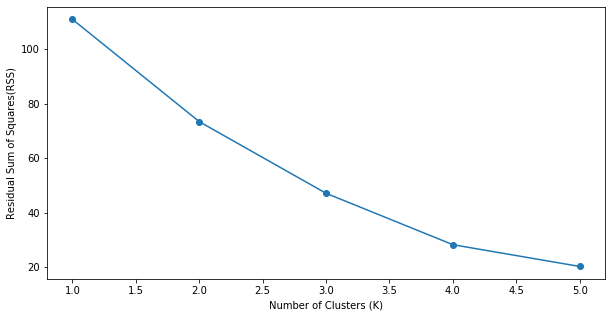

In [93]:
sse = []
kList = list(range(1,6))

for k in kList:
    km = KMeans(n_clusters=k)
    km.fit(clus)
    sse.append(km.inertia_)

plt.figure(figsize=(10,5))
plt.plot(kList, sse, '-o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Residual Sum of Squares(RSS)')
plt.show()

- Optimal number of K is concluded to be 3.

### 4.3 K-Means Clustering

In [94]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 1 0 0 0 0 1 0 0 0 2 2 0 2 0 2 2 2 1 2 0 2 0 0 1 2 0 1 0 1 1 0]


In [95]:
dev["Cluster No"] = labels
dev.head(5)

Neighborhood  Total Residents  Total Amenities  No of BuiltOut < 5km  \
0        LEGACY             6420              1.0                     0   
1   CORNERSTONE             2648              1.0                     1   
2   ASPEN WOODS             9446             26.0                    13   
3  COUGAR RIDGE             6997              6.0                    15   
4    AUBURN BAY            17607              4.0                     2   

   Cluster No  
0           0  
1           2  
2           0  
3           0  
4           1

In [96]:
dev.groupby('Cluster No').mean()

Total Residents  Total Amenities  No of BuiltOut < 5km
Cluster No                                                        
0               9073.777778         3.388889              6.000000
1              20252.000000         5.375000              6.375000
2                822.636364         1.909091              5.909091

- Let's add latitude and longitude info back to dataframe to map each neighborhood in cluster.

In [97]:
developing_new = developing[['Neighborhood','Latitude','Longitude']]
dv = dev
dv = dev.join(developing_new.set_index('Neighborhood'), on='Neighborhood')
dv.head()

Neighborhood  Total Residents  Total Amenities  No of BuiltOut < 5km  \
0        LEGACY             6420              1.0                     0   
1   CORNERSTONE             2648              1.0                     1   
2   ASPEN WOODS             9446             26.0                    13   
3  COUGAR RIDGE             6997              6.0                    15   
4    AUBURN BAY            17607              4.0                     2   

   Cluster No   Latitude   Longitude  
0           0  50.856893 -114.002560  
1           2  51.160280 -113.939608  
2           0  51.043119 -114.210185  
3           0  51.070710 -114.210968  
4           1  50.890605 -113.959565

In [124]:
# create a map of Calgary using latitude and longitude values
map_yyc = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, sector, neighborhood, srg in zip(builtOut['Latitude'], builtOut['Longitude'], builtOut['Sector'], builtOut['Neighborhood'],df['SRG']):
    label = '{}, {}'.format(neighborhood, sector)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
            [lat, lng],
            radius = 5,
            popup=label,
            color='blue',
            fill=True,
            fill_color = '#3186cc',
            fill_opacity = 0.7,
            parse_html=False).add_to(map_yyc)

for lat2, lng2, neighborhood2, cluster in zip(dv['Latitude'], dv['Longitude'],dv['Neighborhood'], dv['Cluster No']):
    label = '{}, {}'.format(cluster, neighborhood2)
    label = folium.Popup(label, parse_html = True)
    if cluster == 0:
        folium.CircleMarker(
            [lat2, lng2],
            radius = 5,
            popup=label,
            color='#e6128a',
            fill=True,
            fill_color = '#f0cce0',
            fill_opacity = 0.7,
            parse_html=False).add_to(map_yyc)
    elif cluster == 1:
        folium.CircleMarker(
            [lat2, lng2],
            radius = 5,
            popup=label,
            color='#6100e0',
            fill=True,
            fill_color = '#c8b0e8',
            fill_opacity = 0.7,
            parse_html=False).add_to(map_yyc)
    elif cluster == 2:
        folium.CircleMarker(
            [lat2, lng2],
            radius = 5,
            popup=label,
            color='#f7740f',
            fill=True,
            fill_color = '#f7ccab',
            fill_opacity = 0.7,
            parse_html=False).add_to(map_yyc)

map_yyc

### 4.4 Anomaly Detection

No handles with labels found to put in legend.


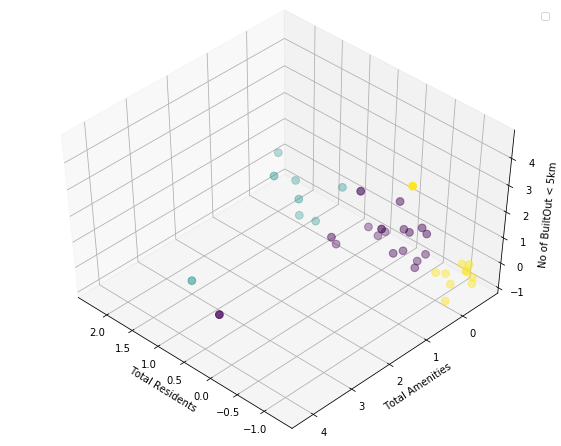

In [99]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Total Residents')
ax.set_ylabel('Total Amenities')
ax.set_zlabel('No of BuiltOut < 5km')

plt.legend()
ax.scatter(Clus_dataSet[:, 0], Clus_dataSet[:, 1], Clus_dataSet[:, 2], s=60,c=labels.astype(np.float))


__(1) Cluster 0 (Purple)__<br>
- Aspen Woods is an anomaly detected in this cluster in terms of having much higher total number of amenities.

In [105]:
dv[dv['Cluster No'] == 0].sort_values(by='Total Amenities', ascending=False)

Neighborhood  Total Residents  Total Amenities  No of BuiltOut < 5km  \
2       ASPEN WOODS             9446             26.0                    13   
17        CHAPARRAL            12654              7.0                     7   
3      COUGAR RIDGE             6997              6.0                    15   
14      COPPERFIELD            13823              5.0                     1   
31     WEST SPRINGS            10758              5.0                    20   
27        SAGE HILL             7924              3.0                     3   
9          REDSTONE             5848              2.0                     0   
28       NOLAN HILL             7505              2.0                     3   
33     NEW BRIGHTON            13103              1.0                     2   
25         MAHOGANY            11784              1.0                     1   
0            LEGACY             6420              1.0                     0   
12        SILVERADO             7655              1.0                     7   
7       ROCKY RIDGE             8398              1.0                     7   
19          KINCORA             6889              0.0                     8   
13           WALDEN             6228              0.0                     1   
10    SKYVIEW RANCH            11707              0.0                     1   
8          SHERWOOD             6246              0.0                     7   
36  SPRINGBANK HILL             9943              0.0                    12   

    Cluster No   Latitude   Longitude  
2            0  51.043119 -114.210185  
17           0  50.883594 -114.021265  
3            0  51.070710 -114.210968  
14           0  50.912048 -113.932098  
31           0  51.058822 -114.204254  
27           0  51.178975 -114.145868  
9            0  51.170807 -113.957483  
28           0  51.177160 -114.163274  
33           0  50.920726 -113.947085  
25           0  50.898702 -113.925905  
0            0  50.856893 -114.002560  
12           0  50.884366 -114.078035  
7            0  51.143274 -114.242722  
19           0  51.158447 -114.133026  
13           0  50.869568 -114.018688  
10           0  51.160534 -113.958135  
8            0  51.159564 -114.148693  
36           0  51.028926 -114.209793

In [102]:
dv_0 = dv[dv['Cluster No'] == 0]
dv_0[dv_0['Neighborhood'] != 'ASPEN WOODS'].mean()

Total Residents         9051.882353
Total Amenities            2.058824
No of BuiltOut < 5km       5.588235
Cluster No                 0.000000
Latitude                  51.031360
Longitude               -114.076462
dtype: float64

__(2) Cluster 1 (Green)__<br>
- Mckenzie Towne is anomaly detected in this cluster in terms of having much higher total number of amenities.

In [103]:
dv[dv['Cluster No'] == 1].sort_values(by='Total Amenities', ascending=False)

Neighborhood  Total Residents  Total Amenities  No of BuiltOut < 5km  \
32  MCKENZIE TOWNE            18283             21.0                     5   
35       EVERGREEN            21500              6.0                    13   
6         TARADALE            19026              5.0                     8   
4       AUBURN BAY            17607              4.0                     2   
23        CRANSTON            19884              4.0                     1   
11    SADDLE RIDGE            22321              2.0                     6   
34  PANORAMA HILLS            25710              1.0                     9   
29        EVANSTON            17685              0.0                     7   

    Cluster No   Latitude   Longitude  
32           1  50.916499 -113.964353  
35           1  50.916379 -114.111578  
6            1  51.116704 -113.938464  
4            1  50.890605 -113.959565  
23           1  50.875210 -113.965956  
11           1  51.129706 -113.944796  
34           1  51.160946 -114.081322  
29           1  51.171292 -114.116352

In [104]:
dv_1 = dv[dv['Cluster No'] == 1]
dv_1[dv_1['Neighborhood'] != 'MCKENZIE TOWNE'].mean()

Total Residents         20533.285714
Total Amenities             3.142857
No of BuiltOut < 5km        6.571429
Cluster No                  1.000000
Latitude                   51.037263
Longitude                -114.016862
dtype: float64

__(3) Cluster 2 (Yellow)__<br>
- Haskayne is anomaly having way higher number of built-out neighborhoods than any others.

In [106]:
dv[dv['Cluster No'] == 2].sort_values(by='No of BuiltOut < 5km', ascending=False)

Neighborhood  Total Residents  Total Amenities  No of BuiltOut < 5km  \
22     HASKAYNE                0             10.0                    40   
5       BELMONT               86              1.0                     5   
15    YORKVILLE               14              1.0                     5   
30   CARRINGTON              572              0.0                     5   
21   LIVINGSTON             1477              0.0                     4   
18  WOLF WILLOW                0              0.0                     2   
20    CITYSCAPE             3104              2.0                     2   
1   CORNERSTONE             2648              1.0                     1   
24        SETON             1134              2.0                     1   
16   PINE CREEK               14              0.0                     0   
26    HOMESTEAD                0              4.0                     0   

    Cluster No   Latitude   Longitude  
22           2  51.076889 -114.124009  
5            2  50.868495 -114.062773  
15           2  50.870531 -114.076523  
30           2  51.183050 -114.080296  
21           2  51.184978 -114.064808  
18           2  50.871446 -114.001443  
20           2  51.148549 -113.962668  
1            2  51.160280 -113.939608  
24           2  50.874878 -113.948915  
16           2  50.849703 -114.014795  
26           2  53.431253 -113.493237

In [107]:
dv_2 = dv[dv['Cluster No'] == 2]
dv_2[dv_2['Neighborhood'] != 'HASKAYNE'].mean()

Total Residents         904.900000
Total Amenities           1.100000
No of BuiltOut < 5km      2.500000
Cluster No                2.000000
Latitude                 51.244316
Longitude              -113.964507
dtype: float64

### 4.5 K-Means Clustering without anomalies

In [108]:
indexNames = dv[ dv['Neighborhood'] == 'HASKAYNE' ].index
 
# Delete these row indexes from dataFrame
dv_r0 = dv.drop(indexNames)
dv_r0.shape

(36, 7)

In [109]:
indexNames = dv_r0[ dv_r0['Neighborhood'] == 'MCKENZIE TOWNE' ].index
 
# Delete these row indexes from dataFrame
dv_r1 = dv_r0.drop(indexNames)
dv_r1.shape

(35, 7)

In [110]:
indexNames = dv_r1[ dv_r1['Neighborhood'] == 'ASPEN WOODS' ].index
 
# Delete these row indexes from dataFrame
dv_r2 = dv_r1.drop(indexNames)
dv_r2.shape

(34, 7)

In [111]:
dev2 = dv_r2[['Neighborhood', 'Total Residents','Total Amenities','No of BuiltOut < 5km']]
dev2.head()

Neighborhood  Total Residents  Total Amenities  No of BuiltOut < 5km
0        LEGACY             6420              1.0                     0
1   CORNERSTONE             2648              1.0                     1
3  COUGAR RIDGE             6997              6.0                    15
4    AUBURN BAY            17607              4.0                     2
5       BELMONT               86              1.0                     5

In [112]:
dev2 = dev2.fillna(0)

In [113]:
X2 = dev2.values[:,1:]
X2 = np.nan_to_num(X2)
Clus_dataSet2 = StandardScaler().fit_transform(X2)
Clus_dataSet2

array([[-0.36055435, -0.48257301, -1.0398586 ],
       [-0.8837302 , -0.48257301, -0.82687552],
       [-0.28052453,  1.93029205,  2.15488771],
       [ 1.19108091,  0.96514602, -0.61389243],
       [-1.23907922, -0.48257301,  0.02505683],
       [ 1.38789601,  1.44771904,  0.6640061 ],
       [-0.08620604, -0.48257301,  0.45102301],
       [-0.38468812, -0.96514602,  0.45102301],
       [-0.43989067,  0.        , -1.0398586 ],
       [ 0.37275178, -0.96514602, -0.82687552],
       [ 1.84491202,  0.        ,  0.23803992],
       [-0.18926003, -0.48257301,  0.45102301],
       [-0.38718472, -0.96514602, -0.82687552],
       [ 0.66624067,  1.44771904, -0.82687552],
       [-1.24906561, -0.48257301,  0.02505683],
       [-1.24906561, -0.96514602, -1.0398586 ],
       [ 0.50410054,  2.41286506,  0.45102301],
       [-1.25100741, -0.96514602, -0.61389243],
       [-0.29550412, -0.96514602,  0.6640061 ],
       [-0.82048306,  0.        , -0.61389243],
       [-1.04614773, -0.96514602, -0.187

In [114]:
clus2 = pd.DataFrame(Clus_dataSet2)
clus2

0         1         2
0  -0.360554 -0.482573 -1.039859
1  -0.883730 -0.482573 -0.826876
2  -0.280525  1.930292  2.154888
3   1.191081  0.965146 -0.613892
4  -1.239079 -0.482573  0.025057
5   1.387896  1.447719  0.664006
6  -0.086206 -0.482573  0.451023
7  -0.384688 -0.965146  0.451023
8  -0.439891  0.000000 -1.039859
9   0.372752 -0.965146 -0.826876
10  1.844912  0.000000  0.238040
11 -0.189260 -0.482573  0.451023
12 -0.387185 -0.965146 -0.826876
13  0.666241  1.447719 -0.826876
14 -1.249066 -0.482573  0.025057
15 -1.249066 -0.965146 -1.039859
16  0.504101  2.412865  0.451023
17 -1.251007 -0.965146 -0.613892
18 -0.295504 -0.965146  0.664006
19 -0.820483  0.000000 -0.613892
20 -1.046148 -0.965146 -0.187926
21  1.506900  0.965146 -0.826876
22 -1.093722  0.000000 -0.826876
23  0.383432 -0.482573 -0.826876
24 -1.251007  0.965146 -1.039859
25 -0.151950  0.482573 -0.400909
26 -0.210065  0.000000 -0.400909
27  1.201900 -0.965146  0.451023
28 -1.171671 -0.965146  0.025057
29  0.241126  1.447719  3.219803
30  0.566377 -0.482573 -0.613892
31  2.314966 -0.482573  0.876989
32  1.731039  1.930292  1.728922
33  0.128085 -0.965146  1.515938

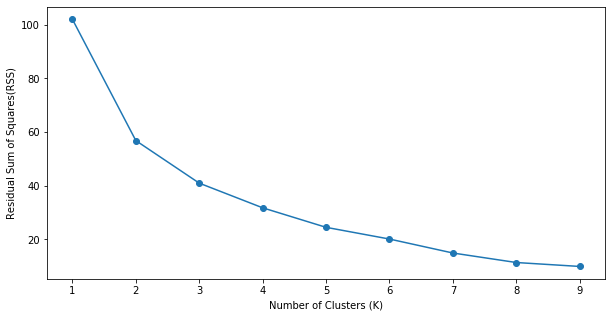

In [115]:
sse2 = []
kList = list(range(1,10))

for k in kList:
    km2 = KMeans(n_clusters=k)
    km2.fit(clus2)
    sse2.append(km2.inertia_)

plt.figure(figsize=(10,5))
plt.plot(kList, sse2, '-o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Residual Sum of Squares(RSS)')
plt.show()

- Optimal number of clusters is concluded to be 3.

In [116]:
clusterNum2 = 3
k_means2 = KMeans(init = "k-means++", n_clusters = clusterNum2, n_init = 12)
k_means2.fit(X2)
labels2 = k_means2.labels_
print(labels2)

[0 1 0 2 1 2 0 0 0 0 2 0 0 0 1 1 0 1 0 1 1 2 1 0 1 0 0 2 1 0 0 2 2 0]


In [117]:
dev2['Cluster No'] = labels2
dev2.head()

Neighborhood  Total Residents  Total Amenities  No of BuiltOut < 5km  \
0        LEGACY             6420              1.0                     0   
1   CORNERSTONE             2648              1.0                     1   
3  COUGAR RIDGE             6997              6.0                    15   
4    AUBURN BAY            17607              4.0                     2   
5       BELMONT               86              1.0                     5   

   Cluster No  
0           0  
1           1  
3           0  
4           2  
5           1

In [125]:
dev2.groupby('Cluster No').mean()

Total Residents  Total Amenities  No of BuiltOut < 5km
Cluster No                                                        
0               9051.882353         2.058824              5.588235
1                904.900000         1.100000              2.500000
2              20533.285714         3.142857              6.571429

In [119]:
developing_new = developing[['Neighborhood','Latitude','Longitude']]
dv2 = dev2
dv2 = dev2.join(developing_new.set_index('Neighborhood'), on='Neighborhood')
dv2.head()

Neighborhood  Total Residents  Total Amenities  No of BuiltOut < 5km  \
0        LEGACY             6420              1.0                     0   
1   CORNERSTONE             2648              1.0                     1   
3  COUGAR RIDGE             6997              6.0                    15   
4    AUBURN BAY            17607              4.0                     2   
5       BELMONT               86              1.0                     5   

   Cluster No   Latitude   Longitude  
0           0  50.856893 -114.002560  
1           1  51.160280 -113.939608  
3           0  51.070710 -114.210968  
4           2  50.890605 -113.959565  
5           1  50.868495 -114.062773

In [120]:
# create a map of Calgary using latitude and longitude values
map_yyc2 = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# add markers to map
for lat, lng, sector, neighborhood, srg in zip(builtOut['Latitude'], builtOut['Longitude'], builtOut['Sector'], builtOut['Neighborhood'],df['SRG']):
    label = '{}, {}'.format(neighborhood, sector)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
            [lat, lng],
            radius = 5,
            popup=label,
            color='blue',
            fill=True,
            fill_color = '#3186cc',
            fill_opacity = 0.7,
            parse_html=False).add_to(map_yyc2)

for lat2, lng2, neighborhood2, cluster in zip(dv2['Latitude'], dv2['Longitude'],dv2['Neighborhood'], dv2['Cluster No']):
    label = '{}, {}'.format(cluster, neighborhood2)
    label = folium.Popup(label, parse_html = True)
    if cluster == 0:
        folium.CircleMarker(
            [lat2, lng2],
            radius = 5,
            popup=label,
            color='#e6128a',
            fill=True,
            fill_color = '#f0cce0',
            fill_opacity = 0.7,
            parse_html=False).add_to(map_yyc2)
    elif cluster == 1:
        folium.CircleMarker(
            [lat2, lng2],
            radius = 5,
            popup=label,
            color='#6100e0',
            fill=True,
            fill_color = '#c8b0e8',
            fill_opacity = 0.7,
            parse_html=False).add_to(map_yyc2)
    elif cluster == 2:
        folium.CircleMarker(
            [lat2, lng2],
            radius = 5,
            popup=label,
            color='#f7740f',
            fill=True,
            fill_color = '#f7ccab',
            fill_opacity = 0.7,
            parse_html=False).add_to(map_yyc2)

map_yyc2

In [121]:
dev2.groupby('Cluster No').mean()

Total Residents  Total Amenities  No of BuiltOut < 5km
Cluster No                                                        
0               9051.882353         2.058824              5.588235
1                904.900000         1.100000              2.500000
2              20533.285714         3.142857              6.571429

- There's no movements of data points from one cluster to another by removing anomalies, as the mean values for each cluster stays same.<br>
- All of three categories: total resident number, total amenities number, number of builout areas, are proportional to each other. In other words, the higher number of total residents is, the higher number of total amenities, as well as, number of built-out areas are. In this sense, three groups can be described by the level of development: low, medium, and high. Cluster 0 corresponds to low, cluster 1 does to high and cluster 2 does to medium.<br>
- __Cluster 1 (Low)__: If looking at the map, all the neighborhoods, belonging to this cluster, are located around the outer boundaries of Calgary. This cluster "Low" is rather close to cluster "Med" than cluster "High" or built-out areas. So, for the time being that cluster "Low" is catching up with its own development, it would be wiser to develop cluster "Med" areas first to have more number of amenities, which attracts more residents to come and live and makes "Med" to "High" level of development areas. This will naturally lead to following development of cluster "Low", with being located close to semi-cluster "High".<br>
- __Cluster 0 (Med)__: all the neighborhoods in cluster "Med" are located around the outer boundaries, just like cluster "Low", but with being closer to built-out districts.<br> West Srpings, Cougar Ridge, and Springbank Hill are not recommended areas for low-risk seeking business persons to start their businesses. Although they show low number of amenities within their areas, since quite many number of built-out areas, over ten, are closeby, their new businesses should compete not only with the ones within the neighborhood, but also with the ones in those built-out areas. Therefore, for low-risk-seeking business persons would rather like to start their businesses in the neighborhoods within this cluster, except West Srpings, Cougar Ridge, and Springbank Hill. However, it could also be interpreted that, these three areas are very "sexy" in terms of having possibilities to target people in built-out areas closeby, as well as people within the neighborhood, if the business is attractive enough to compete over the ones in built-out areas.<br>
- __Cluster 2 (High)__: all the neighborhoods in this cluster would be "sweetpies" for potential business persons, because each neighborhood already secures large enough number of residents(average 20,000) who could be potential customers, even if competition with businesses in close built-out areas is inevitable.